In [1]:
import os

homeDir = os.environ['HOMEPATH']
moLibsDir = os.path.join(homeDir, "Documents", "Dymola")
ibpsaDir = os.path.join(moLibsDir, "modelica-ibpsa", "IBPSA")
buildingSystemsDir = os.path.join(moLibsDir, "BuildingSystems", "BuildingSystems")
libDir = ibpsaDir

fil = dict()
if os.path.isfile(os.path.join(libDir, "package.mo")):
    for (dirpath, dirnames, filenames) in os.walk(libDir):
        for dirname in dirnames:
            dirpathname = os.path.join(dirpath, dirname)
            for filename in filenames:
                filpathname = os.path.abspath(os.path.join(dirpathname, filename))                
                if len(filpathname)>180:
                    print(f"{len(filpathname)} chars: {filpathname}")
                fil[filpathname] = len(filpathname)

nFiles = len(fil)
print(f"Found {nFiles} files")
# print(fil)

181 chars: C:\Users\matthis.thorade\Documents\Dymola\modelica-ibpsa\IBPSA\Fluid\Geothermal\Borefields\BaseClasses\Boreholes\BaseClasses\Functions\Validation\convectionResistanceCircularPipe.mo
182 chars: C:\Users\matthis.thorade\Documents\Dymola\modelica-ibpsa\IBPSA\Fluid\Geothermal\Borefields\BaseClasses\HeatTransfer\ThermalResponseFactors\Examples\cylindricalHeatSource_Integrand.mo
Found 1571 files


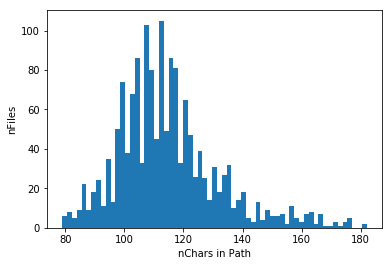

In [3]:
import matplotlib.pyplot as plt

lists = sorted(fil.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

fig, ax = plt.subplots()
nBins = round(nFiles/25)
ax.hist(y, bins=nBins)
plt.xlabel('nChars in Path')
plt.ylabel('nFiles')

plt.savefig('pathlength.pdf')
plt.show()